## Prepare data

In [1]:
import numpy as np
from scipy.stats import norm

np.random.seed(42)

x_train = np.linspace(-2, 2, 5).reshape(-1, 1)
y_train = norm.pdf(x_train[:, 0])

x_test = np.linspace(-5, 5, 1000).reshape(-1, 1)
y_test = norm.pdf(x_test[:, 0])

## Run the algorithm

In [2]:
import logging
logging.basicConfig(
    filename='debug.log', 
    format='%(levelname)s:%(message)s', 
    encoding='utf-8', 
    level=logging.DEBUG,
    filemode='w',
)

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
from symbolizer import Symbolizer
symbolizer = Symbolizer(x_train, y_train, max_complexity=10, n_constants=2)
expression = symbolizer.run()

0it [00:00, ?it/s]

10155it [00:10, 828.47it/s]

## Evaluate results

In [ ]:
from symbolizer.expression import expression2str
print(f"Found expression: {expression2str(expression)}")

Found expression: (0.398942) / (sqrt(exp(sqr(x0))))


In [ ]:
from symbolizer.compute_expression import compute_expression
y_pred = compute_expression(expression, x_test)
max_absolute_error = np.max(np.abs(y_pred - y_test))
print(f"Max absolute error is {max_absolute_error}")

Max absolute error is 1.0049799451655739e-07


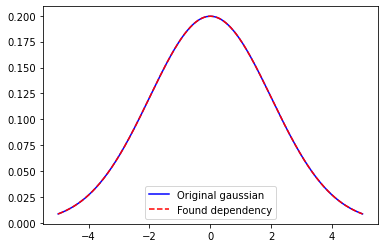

In [ ]:
from matplotlib import pyplot as plt
plt.plot(x_test, y_test, 'b')
plt.plot(x_test, y_pred, 'r--')
plt.legend(["Original gaussian", "Found dependency"])
plt.show()